# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [66]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [68]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 584


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [62]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+"q="+city+"&appid="+weather_api_key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    #response = requests.get(city_url).json()
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()# YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"] # YOUR CODE HERE
        city_lng = city_weather["coord"]["lon"]# YOUR CODE HERE
        city_max_temp = city_weather["main"]["temp_max"]# YOUR CODE HERE
        city_humidity = city_weather["main"]["humidity"]# YOUR CODE HERE
        city_clouds = city_weather["clouds"]["all"]# YOUR CODE HERE
        city_wind = city_weather["wind"]["speed"]# YOUR CODE HERE
        city_country = city_weather["sys"]["country"]# YOUR CODE HERE
        city_date = city_weather["dt"]# YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
print(city_url)

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | labuan lombok
City not found. Skipping...
Processing Record 2 of Set 1 | lebu
Processing Record 3 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | jackson
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | longyearbyen
Processing Record 8 of Set 1 | port mathurin
Processing Record 9 of Set 1 | st. john's
Processing Record 10 of Set 1 | midyat
Processing Record 11 of Set 1 | vung tau
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | cruzeiro do sul
Processing Record 14 of Set 1 | wynyard
Processing Record 15 of Set 1 | pitimbu
Processing Record 16 of Set 1 | whitehorse
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | monrovia
Processing Record 19 of Set 1 | talnakh
Processing Record 20 of Set 1 | dakhla
Processing Record 21 of Set 1 | sishilichengzi
Cit

Processing Record 36 of Set 4 | puerto baquerizo moreno
Processing Record 37 of Set 4 | bhimunipatnam
Processing Record 38 of Set 4 | cartagena
Processing Record 39 of Set 4 | hirara
Processing Record 40 of Set 4 | tancitaro
Processing Record 41 of Set 4 | okhotsk
Processing Record 42 of Set 4 | salmon arm
Processing Record 43 of Set 4 | castillos
Processing Record 44 of Set 4 | hamilton
Processing Record 45 of Set 4 | tuy hoa
Processing Record 46 of Set 4 | mora
Processing Record 47 of Set 4 | escanaba
Processing Record 48 of Set 4 | crane
Processing Record 49 of Set 4 | bykovo
Processing Record 0 of Set 5 | muroto-misakicho
Processing Record 1 of Set 5 | fukuecho
Processing Record 2 of Set 5 | san antonio de pale
Processing Record 3 of Set 5 | kutum
Processing Record 4 of Set 5 | bel ombre
Processing Record 5 of Set 5 | chibougamau
Processing Record 6 of Set 5 | altai
Processing Record 7 of Set 5 | cill airne
Processing Record 8 of Set 5 | coquimbo
Processing Record 9 of Set 5 | ketc

Processing Record 29 of Set 8 | tynda
Processing Record 30 of Set 8 | port blair
Processing Record 31 of Set 8 | mong cai
City not found. Skipping...
Processing Record 32 of Set 8 | villa union
Processing Record 33 of Set 8 | mugia
Processing Record 34 of Set 8 | bathsheba
Processing Record 35 of Set 8 | porkhov
Processing Record 36 of Set 8 | port elizabeth
Processing Record 37 of Set 8 | santa ana de yacuma
Processing Record 38 of Set 8 | bismarck
Processing Record 39 of Set 8 | san fernando de apure
Processing Record 40 of Set 8 | novomikhaylovskiy
Processing Record 41 of Set 8 | obigarm
Processing Record 42 of Set 8 | berezovyy
Processing Record 43 of Set 8 | pathein
Processing Record 44 of Set 8 | nampula
Processing Record 45 of Set 8 | mogocha
Processing Record 46 of Set 8 | matoury
Processing Record 47 of Set 8 | riviere-du-loup
Processing Record 48 of Set 8 | aasiaat
Processing Record 49 of Set 8 | laboulaye
Processing Record 0 of Set 9 | shetpe
Processing Record 1 of Set 9 | a

In [69]:
print(len(city_data))

545


In [70]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          545
Lat           545
Lng           545
Max Temp      545
Humidity      545
Cloudiness    545
Wind Speed    545
Country       545
Date          545
dtype: int64

In [72]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lebu,-37.6167,-73.6500,281.76,85,86,0.28,CL,1690423527
1,port-aux-francais,-49.3500,70.2167,277.59,78,90,16.12,TF,1690423526
2,jackson,42.4165,-122.8345,305.08,22,0,7.20,US,1690423608
3,ushuaia,-54.8000,-68.3000,272.96,69,0,2.57,AR,1690423657
4,longyearbyen,78.2186,15.6401,284.06,71,75,1.03,SJ,1690423533


In [73]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [74]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lebu,-37.6167,-73.6500,281.76,85,86,0.28,CL,1690423527
1,port-aux-francais,-49.3500,70.2167,277.59,78,90,16.12,TF,1690423526
2,jackson,42.4165,-122.8345,305.08,22,0,7.20,US,1690423608
3,ushuaia,-54.8000,-68.3000,272.96,69,0,2.57,AR,1690423657
4,longyearbyen,78.2186,15.6401,284.06,71,75,1.03,SJ,1690423533


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

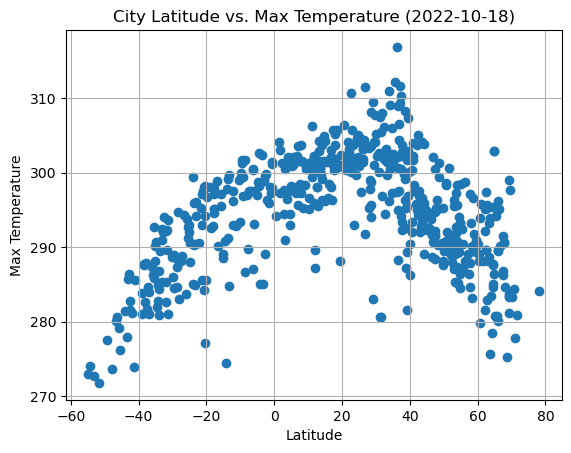

In [76]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
x = city_data_df["Lat"]
y = city_data_df["Max Temp"]

plt.scatter(x, y)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Max Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
# Save the figure
plt.grid()
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

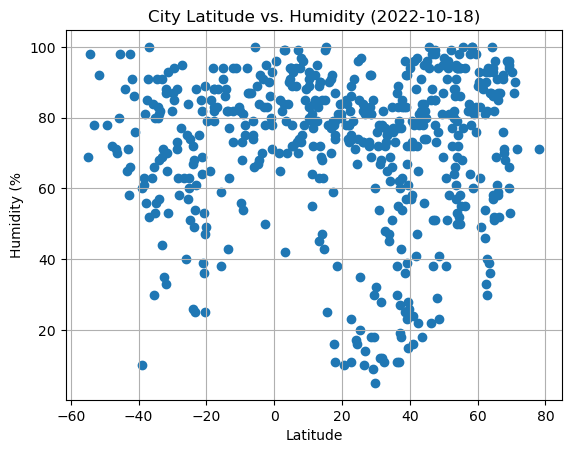

In [78]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
x = city_data_df["Lat"]
y = city_data_df["Humidity"]

plt.scatter(x, y)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%")
# Save the figure
plt.grid()
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

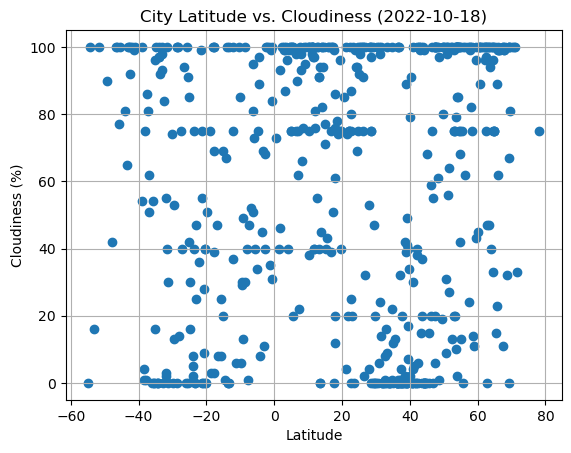

In [79]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
x = city_data_df["Lat"]
y = city_data_df["Cloudiness"]

plt.scatter(x, y)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# Save the figure
plt.grid()
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

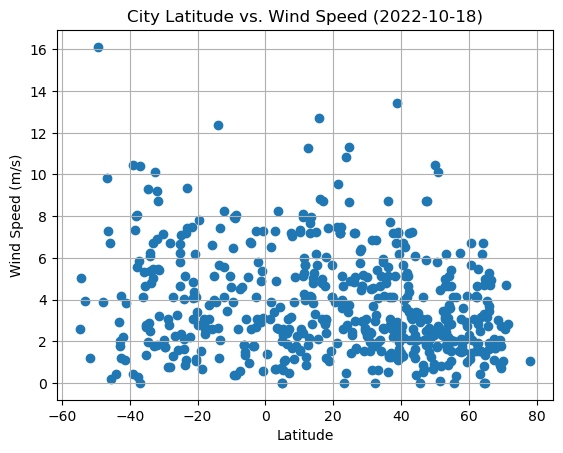

In [80]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
x = city_data_df["Lat"]
y = city_data_df["Wind Speed"]

plt.scatter(x, y)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
# Save the figure
plt.grid()
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [81]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE


In [82]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df["Lat"] >=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,jackson,42.4165,-122.8345,305.08,22,0,7.20,US,1690423608
4,longyearbyen,78.2186,15.6401,284.06,71,75,1.03,SJ,1690423533
6,st. john's,47.5649,-52.7093,292.19,85,100,8.75,CA,1690423643
7,midyat,37.4247,41.3393,300.53,18,4,2.57,TR,1690423658
8,vung tau,10.3460,107.0843,300.97,83,100,7.33,VN,1690423626


In [83]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df["Lat"] <=0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lebu,-37.6167,-73.6500,281.76,85,86,0.28,CL,1690423527
1,port-aux-francais,-49.3500,70.2167,277.59,78,90,16.12,TF,1690423526
3,ushuaia,-54.8000,-68.3000,272.96,69,0,2.57,AR,1690423657
5,port mathurin,-19.6833,63.4167,296.78,79,51,7.81,MU,1690423657
9,grytviken,-54.2811,-36.5092,274.02,98,100,5.05,GS,1690423658


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.5911627854059414


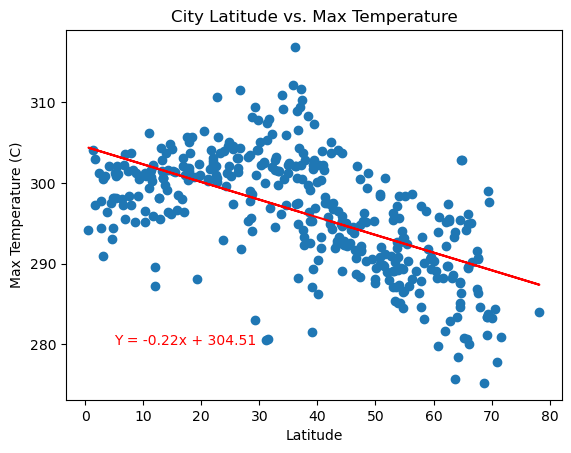

In [84]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
slope, intercept, r, p, stderr = linregress(x,y)
regline = slope * x + intercept
plt.scatter(x, y)
# Incorporate the other graph properties
# YOUR CODE HERE
rndintercept = round(intercept, 2)
rndslope = round(slope, 2)
line = f"Y = {rndslope}x + {rndintercept}" 
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.plot(x, regline, color="r")
plt.annotate(line, (5,280), color="r")
# Show plot
print(f"The r-value is: {r}")
plt.show()


The r-value is: 0.7569898097009429


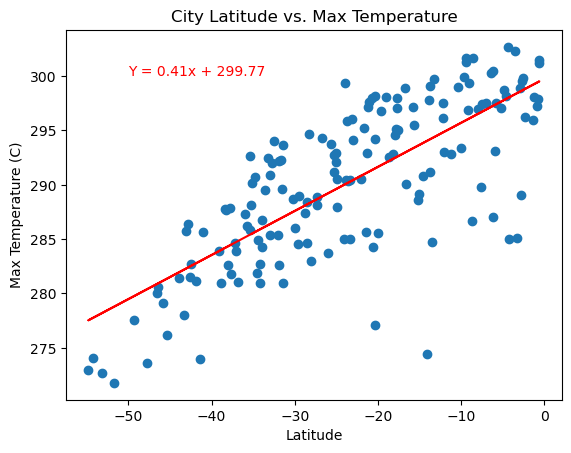

In [85]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]
slope, intercept, r, p, stderr = linregress(x,y)
regline = slope * x + intercept
plt.scatter(x, y)
rndintercept = round(intercept, 2)
rndslope = round(slope, 2)
line = f"Y = {rndslope}x + {rndintercept}" 
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.plot(x, regline, color="r")
plt.annotate(line, (-50,300), color="r")
# Show plot
print(f"The r-value is: {r}")
plt.show()

**Discussion about the linear relationship:** In the southern hemisphere, the r value is 0.83 which means there is strong positive correlation between latitude and temperature. As the latitude increases, so does the temperature. Conversely, the northern hemispheric analysis shows r-value as -0.61 which means there is a negative relationship between temperature and latitude. As the latitude increases, the temperature drops.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.003978972137565709


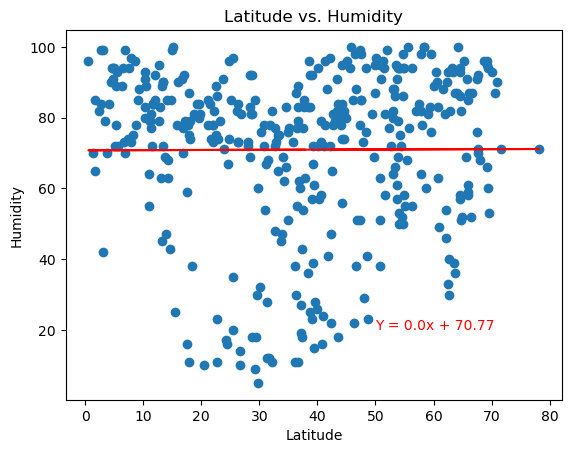

In [86]:
# Northern Hemisphere
# YOUR CODE HERE
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]
slope, intercept, r, p, stderr = linregress(x,y)
regline = slope * x + intercept
plt.scatter(x, y)
# Incorporate the other graph properties
# YOUR CODE HERE
rndintercept = round(intercept, 2)
rndslope = round(slope, 2)
line = f"Y = {rndslope}x + {rndintercept}" 
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.plot(x, regline, color="r")
plt.annotate(line, (50,20), color="r")
# Show plot
print(f"The r-value is: {r}")
plt.show()


The r-value is: 0.11675422970358344


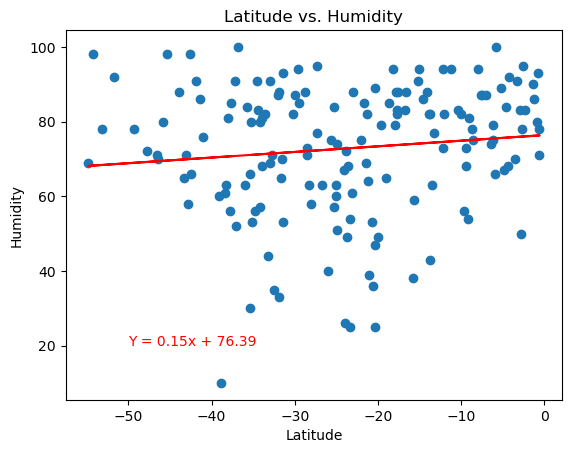

In [87]:
# Southern Hemisphere
# YOUR CODE HERE
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]
slope, intercept, r, p, stderr = linregress(x,y)
regline = slope * x + intercept
plt.scatter(x, y)
# Incorporate the other graph properties
# YOUR CODE HERE
rndintercept = round(intercept, 2)
rndslope = round(slope, 2)
line = f"Y = {rndslope}x + {rndintercept}" 
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.plot(x, regline, color="r")
plt.annotate(line, (-50,20), color="r")
# Show plot
print(f"The r-value is: {r}")
plt.show()


**Discussion about the linear relationship:** the r-values are fairly small for humidity for both hemispheres meaning there is not a strong relationship between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.012412940507369597


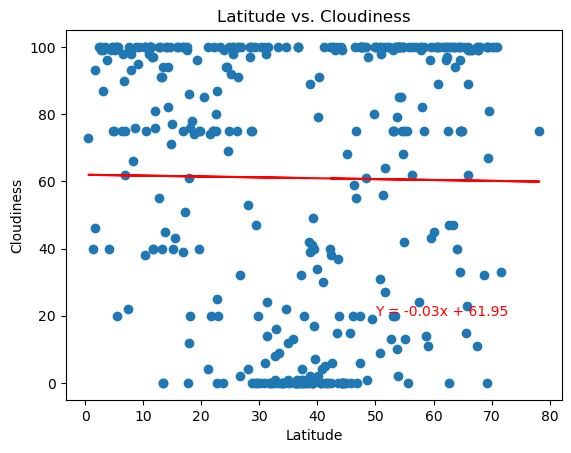

In [88]:
# Northern Hemisphere
# YOUR CODE HERE
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]
slope, intercept, r, p, stderr = linregress(x,y)
regline = slope * x + intercept
plt.scatter(x, y)
# Incorporate the other graph properties
# YOUR CODE HERE
rndintercept = round(intercept, 2)
rndslope = round(slope, 2)
line = f"Y = {rndslope}x + {rndintercept}" 
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.plot(x, regline, color="r")
plt.annotate(line, (50,20), color="r")
# Show plot
print(f"The r-value is: {r}")
plt.show()

The r-value is: -0.08752257880695677


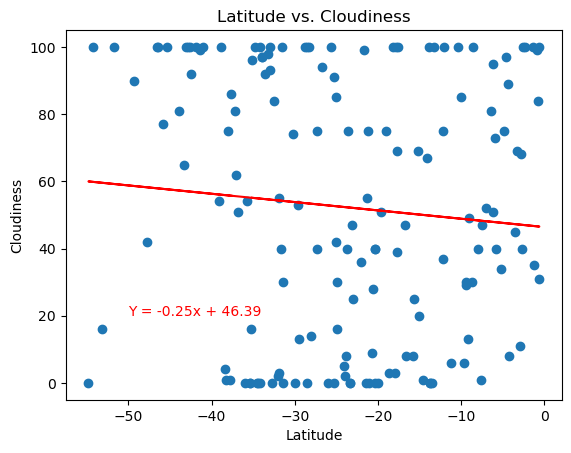

In [89]:
# Southern Hemisphere
# YOUR CODE HERE
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]
slope, intercept, r, p, stderr = linregress(x,y)
regline = slope * x + intercept
plt.scatter(x, y)
# Incorporate the other graph properties
# YOUR CODE HERE
rndintercept = round(intercept, 2)
rndslope = round(slope, 2)
line = f"Y = {rndslope}x + {rndintercept}" 
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.plot(x, regline, color="r")
plt.annotate(line, (-50,20), color="r")
# Show plot
print(f"The r-value is: {r}")
plt.show()


**Discussion about the linear relationship:** Again, the r-values are fairly small. In northern hemisphere, it's almost a flat line meaning there is a very weak relationship between cloudiness and latitude. The southern hemisphere, interestingly, shows a slightly better relationship with r-value at -0.21 suggesting cloudiness increases slightly as latitude drops.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.21450350068152155


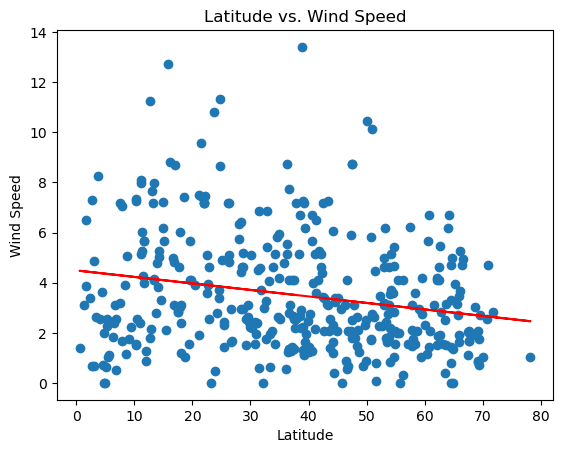

In [90]:
# Northern Hemisphere
# YOUR CODE HERE
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]
slope, intercept, r, p, stderr = linregress(x,y)
regline = slope * x + intercept
plt.scatter(x, y)
# Incorporate the other graph properties
# YOUR CODE HERE
rndintercept = round(intercept, 2)
rndslope = round(slope, 2)
line = f"Y = {rndslope}x + {rndintercept}" 
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.plot(x, regline, color="r")
plt.annotate(line, (10,15), color="r")
# Show plot
print(f"The r-value is: {r}")
plt.show()


The r-value is: -0.08866356157683282


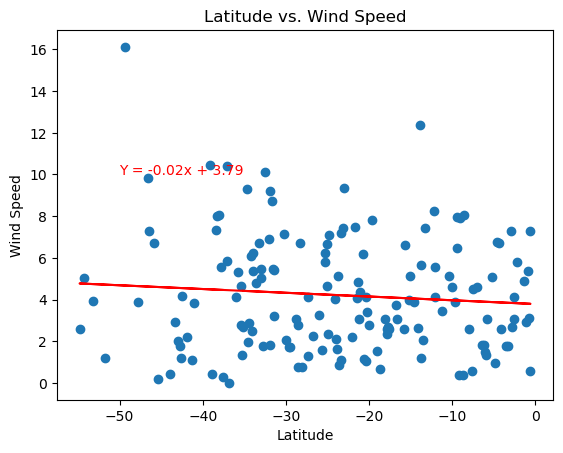

In [91]:
# Southern Hemisphere
# YOUR CODE HERE
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]
slope, intercept, r, p, stderr = linregress(x,y)
regline = slope * x + intercept
plt.scatter(x, y)
# Incorporate the other graph properties
# YOUR CODE HERE
rndintercept = round(intercept, 2)
rndslope = round(slope, 2)
line = f"Y = {rndslope}x + {rndintercept}" 
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.plot(x, regline, color="r")
plt.annotate(line, (-50,10), color="r")
# Show plot
print(f"The r-value is: {r}")
plt.show()

**Discussion about the linear relationship:** Norhtern and Southern hemispheres have a nearly identical relationship between latitude and wind speed. Increasing latitude means decreasing wind speed. 